# Scottish Haggis Data Analysis
**Author:** Pedro Fernandes

## 1. Introduction

### Description of the Dataset

This dataset contains 344 recorded sightings of the Scottish haggis which is a rare wildlife species recently discovered across three Scottish islands: Iona, Skye, and Shetland. This monitoring effort was commissioned by Lord Ramsay McCraig, a renowned Scottish wildlife pioneer, and has documented three distinct species: the **Macduff**, the **Wild Rambler**, and the **Bog Sniffler**.

Each observation includes:

- **Morphological measurements**: nose length (mm), eye size (mm), tail length (mm), and body mass (g)
- **Demographic data**: sex of the specimen
- **Temporal and geographical context**: island location and year of sighting (2023–2025)

The dataset represents a unique opportunity to understand the physical characteristics and distributions of these newly monitored species across different island ecosystems.

---

## Step 1: Understanding the Dataset
Before analysing, we need to understand:
- how many rows there are
- how many columns
- what type of data each column contains
- whether there are missing values


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set visual style
sns.set(style="whitegrid")

# Load data
df = pd.read_csv('scottish_haggis_2025.csv')

print("Dataset loaded successfully!")

# Inspect first 5 rows
print("First 5 rows:")
display(df.head())

Dataset loaded successfully!
First 5 rows:


,id,species,island,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,sex,year
0,1,Macduff,Skye,34.47,17.77,190.23,3813.55,female,2025
1,2,Macduff,Skye,40.67,19.91,202.80,4860.88,male,2025
2,3,Macduff,Skye,38.90,16.31,184.34,3302.49,female,2025
3,4,Macduff,Skye,37.15,19.82,190.97,4217.32,male,2025
4,5,Macduff,Skye,37.86,18.79,193.00,3082.64,female,2025


In [8]:
# Check data types and missing values
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              344 non-null    int64  
 1   species         344 non-null    object 
 2   island          344 non-null    object 
 3   nose_length_mm  342 non-null    float64
 4   eye_size_mm     342 non-null    float64
 5   tail_length_mm  342 non-null    float64
 6   body_mass_g     342 non-null    float64
 7   sex             334 non-null    object 
 8   year            344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB
None


In [18]:
# Summary statistics
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,id,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.939883,17.159006,200.901374,4205.796287,2024.029070
std,99.448479,5.477357,1.995574,14.121750,802.563431,0.818356
min,1.000000,32.080000,13.120000,171.000000,2616.550000,2023.000000
25%,86.750000,39.355000,15.462500,189.420000,3572.057500,2023.000000
50%,172.500000,44.540000,17.385000,196.730000,4045.035000,2024.000000
75%,258.250000,48.360000,18.700000,212.900000,4798.850000,2025.000000
max,344.000000,59.030000,21.610000,232.340000,6235.810000,2025.000000


In [10]:
#Check for unique values in categorical columns to identify typos
print("\nUnique Species:", df['species'].unique())
print("Unique Sex:", df['sex'].unique())
print("Unique Islands:", df['island'].unique())


Unique Species: ['Macduff' 'WildRambler' 'BogSniffler']
Unique Sex: ['female' 'male' nan 'green']
Unique Islands: ['Skye' 'Iona' 'Shetland']


## Stage 1: Data Cleaning & Exploratory Data Analysis (EDA)

### Data Cleaning:
During inspection, we identified the following issues:
1.  **Missing Values**: There are a few rows missing physical measurements (`nose_length_mm`, etc.) and some missing `sex`.
2.  **Data Errors**: One record has 'green' listed as the sex, which is clearly a data entry error.

**Justification**:
* We will drop the row with 'green' sex as it is invalid.
* We will drop rows with missing measurements and missing sex. Since these represent a very small percentage of the dataset (<5%), removing them is safer than imputing (guessing) values, which could introduce bias.

In [ ]:
# 1. Drop rows where measurements are missing
df_clean = df.dropna(subset=['nose_length_mm', 'body_mass_g'])

# 2. Fix the 'green' sex error (remove that row)
df_clean = df_clean[df_clean['sex'] != 'green']

# 3. Drop rows where sex is missing (NaN)
df_clean = df_clean.dropna(subset=['sex'])

print(len(df))
print(len(df_clean))
print
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")

# Verify clean
print("\nRemaining missing values:")
print(df_clean.isnull().sum())

Original dataset shape: (344, 9)
Cleaned dataset shape: (333, 9)

Remaining missing values:
id                0
species           0
island            0
nose_length_mm    0
eye_size_mm       0
tail_length_mm    0
body_mass_g       0
sex               0
year              0
dtype: int64


### Exploratory Data Analysis (EDA):
Now that our data is cleaned, we can visualise the data to understand distributions and relationships.


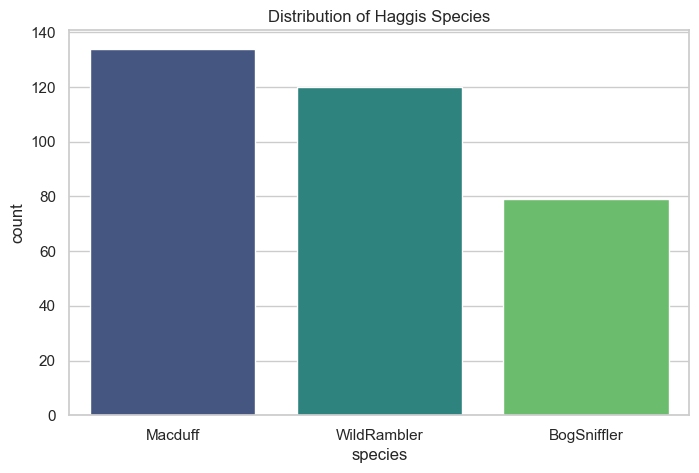

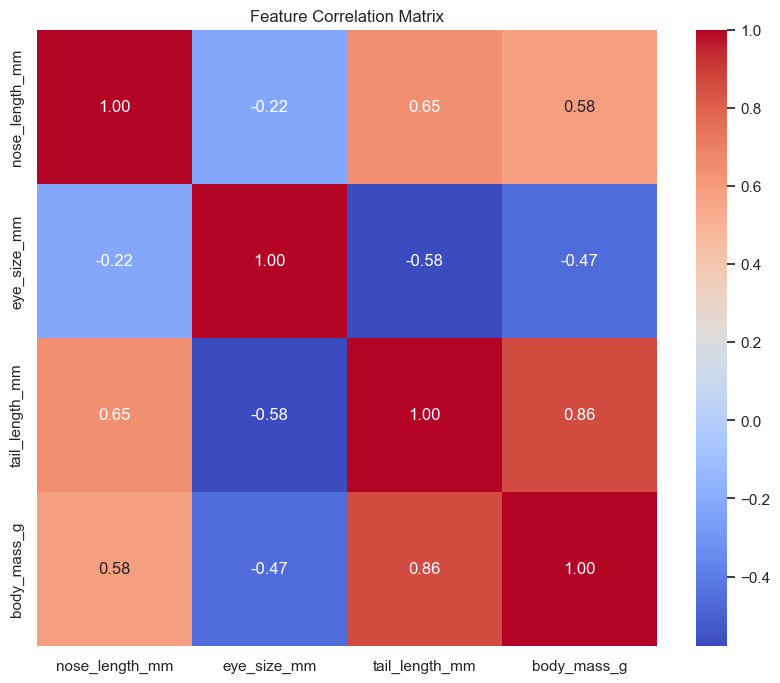

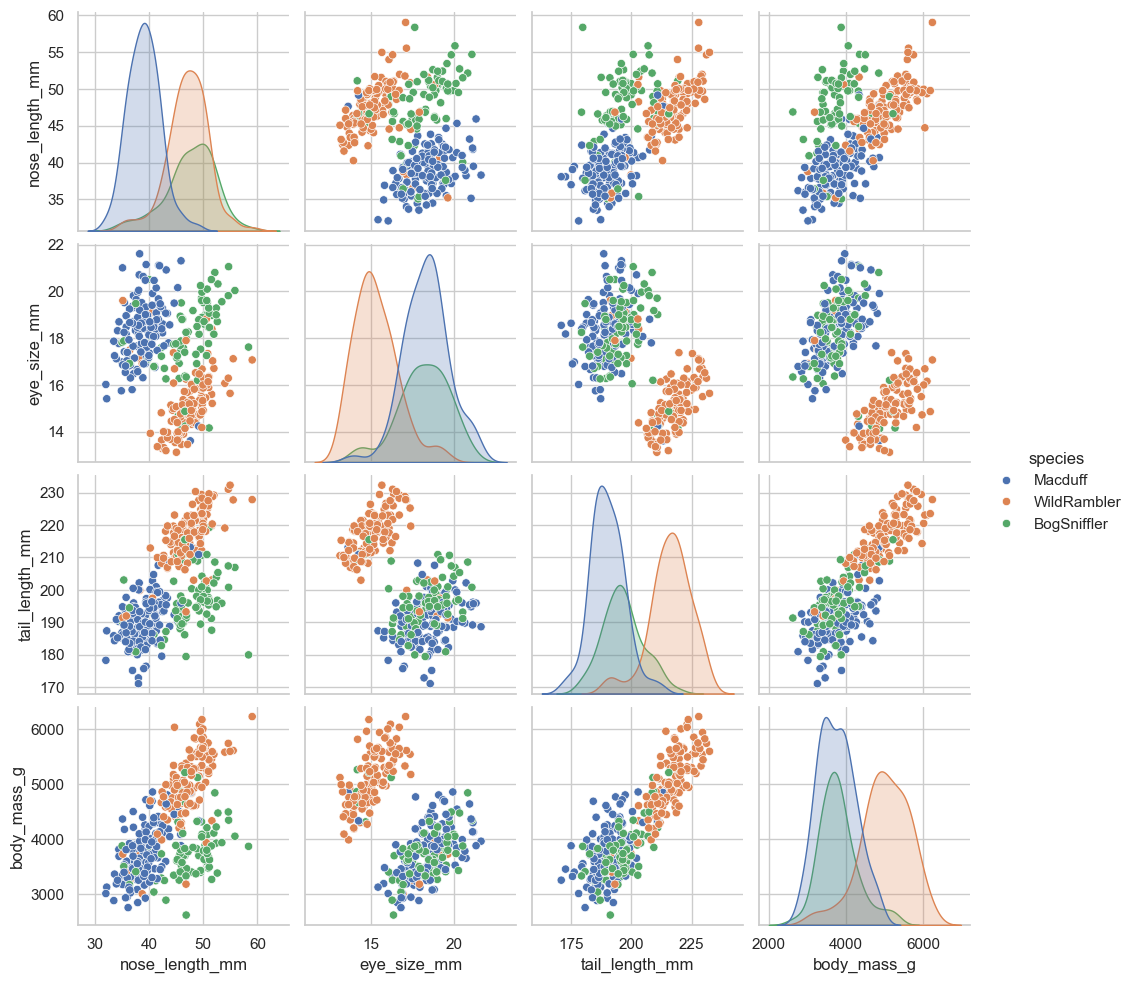

In [12]:
# Histogram of Species
plt.figure(figsize=(8, 5))
sns.countplot(x='species', data=df_clean, palette='viridis')
plt.title('Distribution of Haggis Species')
plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_cols = df_clean.select_dtypes(include=[np.number]).drop(['id', 'year'], axis=1)
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

# Pairplot to see relationships by Species
sns.pairplot(df_clean, hue='species', vars=['nose_length_mm', 'eye_size_mm', 'tail_length_mm', 'body_mass_g'])
plt.show()